In [14]:
#init libraries + data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

data = pd.read_csv('sample_data/mnist_train_small.csv')
#data = pd.read_csv('train.csv')

data = np.array(data)
m, n = data.shape

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [ ]:
#activation functions
w_1 = np.random.rand(10, 784)
w_2 = np.random.rand(10, 10)
b_1 = np.random.rand(10)

def relu(x):
    return (x>0) * x
    
def drelu(x):
    return x > 0

def sigmoid(x):
    return 1/(1 + (math.e)**(-x))

def dsigmoid(x):
    return sigmoid(x) * (1-sigmoid(x))

In [16]:
def feedforward(activation, w, b, a):
  z_out = np.matmul(w,a)
  z_out += b.reshape(b.size)
  n = z_out.size
  a_out = np.copy(z_out)
  if activation == "sigmoid":
    for i in range(n):
      a_out[i] = sigmoid(z_out[i])
  elif activation == "relu":
    for i in range(n):
      a_out[i] = relu(z_out[i])
  elif activation == "none":
    return z_out,a_out
  else:
    return "Unrecognized activation function"
  return z_out,a_out
      
def cost(a, i):
  temp = np.zeros(10)
  temp[int(Y_train[i])] = 1
  return np.sum((a-temp)**2)
  
def backprop(activation,z,a,w,dz):
  dw = np.matmul(dz.reshape((dz.size,1)),a.reshape((1,a.size)))
  #print(dw)
  dz_out = np.matmul(dz.reshape((1,dz.size)),w)
  n = dz_out.size
  if activation == "sigmoid":
    for x in range(n):
      dz_out[0][x] = dz_out[0][x] * dsigmoid(z[x])
  elif activation == "relu":
    for x in range(n):
      dz_out[0][x] = dz_out[0][x] * drelu(z[x])
  else:
    return dz_out.reshape(n),dw
  return dz_out.reshape(n),dw


In [17]:
def relu_epoch(alpha,w_1, w_2, b_1,X_train,Y_train):
  dz_2 = np.ones(10)
  for i in range(Y_train.size):
    #feedforward
    z_1,a_1 = feedforward("relu",w_1,b_1,X_train[:,i])
    z_2,a_2 = feedforward("relu",w_2,np.zeros(10),a_1) 
    
    #solution array
    y_2 = np.zeros(10) 
    y_2[int(Y_train[i])] = 1

    #derivatives
    da_2 = a_2-y_2
    for x in range(10):
      dz_2[x] = da_2[x] * drelu(z_2[x])
    dz_1, dw_2 = backprop("relu",z_1,a_1,w_2,dz_2)
    dz_0, dw_1 = backprop("none",X_train[:,i],X_train[:,i],w_1,dz_1)
    
    #update
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    b_1 -= (1/10) * alpha * dz_1 
  return w_1,w_2,b_1

def epoch(alpha,w_1, w_2, b_1,X_train,Y_train):
  dz_2 = np.ones(10)
  for i in range(Y_train.size):
    #feedforward
    z_1,a_1 = feedforward("none",w_1,b_1,X_train[:,i])
    z_2,a_2 = feedforward("none",w_2,np.zeros(10),a_1) 
    
    #solution array
    y_2 = np.zeros(10) 
    y_2[int(Y_train[i])] = 1

    #derivatives
    da_2 = a_2-y_2
    for x in range(10):
      dz_2[x] = da_2[x] 
    dz_1, dw_2 = backprop("none",z_1,a_1,w_2,dz_2)
    dz_0, dw_1 = backprop("none",X_train[:,i],X_train[:,i],w_1,dz_1)
    
    #update
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    b_1 -= (1/10) * alpha * dz_1 
  return w_1,w_2,b_1

def sigmoid_epoch(alpha,w_1, w_2, b_1,X_train,Y_train):
  dz_2 = np.ones(10)
  for i in range(Y_train.size):
    #feedforward
    z_1,a_1 = feedforward("sigmoid",w_1,b_1,X_train[:,i])
    z_2,a_2 = feedforward("sigmoid",w_2,np.zeros(10),a_1) 
    
    #solution array
    y_2 = np.zeros(10) 
    y_2[int(Y_train[i])] = 1

    #derivatives
    da_2 = a_2-y_2
    for x in range(10):
      dz_2[x] = da_2[x] * dsigmoid(z_2[x])
    dz_1, dw_2 = backprop("sigmoid",z_1,a_1,w_2,dz_2)
    dz_0, dw_1 = backprop("none",X_train[:,i],X_train[:,i],w_1,dz_1)
    
    #update
    w_1 -= alpha * dw_1
    w_2 -= alpha * dw_2
    b_1 -= (1/10) * alpha * dz_1 
  return w_1,w_2,b_1

[ 0.05463368 -0.0068496   0.05723767 -0.06849111  0.03028548  0.06777947
  0.07238177  0.00129895  0.04409392  0.41656619] 9
[ 0.05555237 -0.00716933  0.05809326 -0.06784462  0.03105338  0.06720123
  0.07244883  0.00169455  0.04405057  0.41686677] 9
[ 0.0564413  -0.00748568  0.05893418 -0.06722117  0.03180905  0.06665969
  0.07251103  0.00208791  0.04399866  0.4171404 ] 9
[ 0.05730053 -0.00779856  0.05976019 -0.06662006  0.03255212  0.0661532
  0.07256859  0.0024787   0.04393832  0.41738841] 9
[ 0.05813017 -0.00810792  0.06057108 -0.06604064  0.03328226  0.06568018
  0.07262168  0.00286663  0.04386974  0.41761204] 9
[ 0.05893037 -0.00841373  0.06136663 -0.06548224  0.03399919  0.06523907
  0.07267052  0.00325143  0.04379318  0.41781255] 9
[ 0.05970134 -0.00871596  0.06214668 -0.0649442   0.03470268  0.06482841
  0.07271528  0.00363288  0.04370889  0.41799113] 9
[ 0.06044333 -0.0090146   0.06291109 -0.06442586  0.03539253  0.06444675
  0.07275616  0.00401075  0.04361719  0.41814894] 9
[

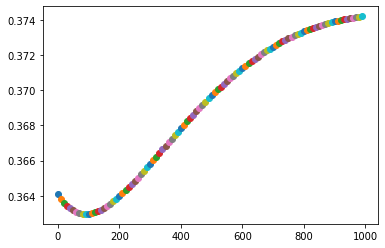

In [33]:
for i in range(10):
    w_1, w_2, b_1 = epoch(0.001, w_1, w_2, b_1,X_train,Y_train)
    if i % 10 == 0:
      z_1,a_1 = feedforward("sigmoid",w_1,b_1,X_train[:,0])
      z_2,a_2 = feedforward("sigmoid",w_2,np.zeros(10),a_1)
      print(a_2,Y_train[0])
      plt.scatter(i,cost(a_2,0))
    
plt.show()

In [37]:
def accuracy(w_1,w_2,b_1,X_train,Y_train):
  n = 0
  for i in range(Y_train.size):
    z_1,a_1 = feedforward("none",w_1,b_1,X_train[:,i])
    z_2,a_2 = feedforward("none",w_2,np.zeros(10),a_1)
    if a_2.argmax() == Y_train[i]:
      n += 1
  return n / Y_train.size

print(accuracy(w_1,w_2,b_1,X_train,Y_train))

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fc83454d200> (for post_execute):


KeyboardInterrupt: ignored